## Shopee - Price Match Guarantee
Determine if two products are the same by their images

Final Exan - CPSC 4830 

About the data set <br>
We have 32,412 images in train_images folder and 3 images in test_images folder. With test.csv and train.csv files. The features of .csv file are:

1. posting_id - The ID/code for the posting
2. image - image ID
3. image_phash - hash/ fingerprint of the image
4. title - image description
5. label_group - ID code for all the posting that maps to the same product (Only provided for train.csv)

## Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Analyzing the data

## Load the data set

In [2]:
train = pd.read_csv('../input/shopee-product-matching/train.csv')
test = pd.read_csv('../input/shopee-product-matching/test.csv')

train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [3]:
train.shape

(34250, 5)

train.csv have 34250 rows and 5 columns.

In [4]:
test.head()

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [5]:
test.shape

(3, 4)

test.csv have 3 rows and 4 columns. We do not have label_group column in test data set

## Training data set

In [6]:
#Total No. of Unique posting id
len(np.unique(train['posting_id']))

34250

In [7]:
#Total No. of Unique images
len(np.unique(train['image']))

32412

From the above numbers we can definitely see that we have images that are being repeated

In [8]:
#Total No. of Label Groups
len(np.unique(train['label_group']))

11014

<AxesSubplot:>

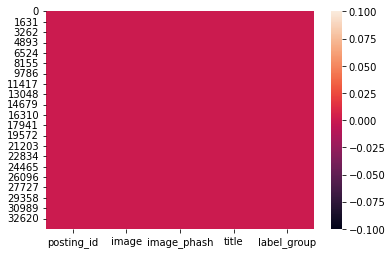

In [9]:
#Check for missing values
sns.heatmap(train.isnull())

There are no missing values in the data set

## Testing data set

In [10]:
#Total No. of Unique posting id
len(np.unique(test['posting_id']))

3

In [11]:
#Total No. of Unique images
len(np.unique(test['image']))

3

<AxesSubplot:>

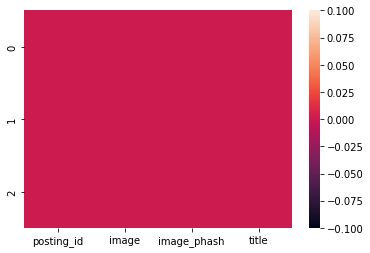

In [12]:
#Check for missing values
sns.heatmap(test.isnull())

No missing values in the test data set

## Text processing

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk
from nltk.corpus import stopwords
import re

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
#Clean the text by removing special chracters and stop words
def textpreprocessing(text):
    text=text.strip()
    text = text.lower()
    punctuations=r'[/\,\-!@%#$^&*|_+)(:]'
    
    text = re.sub(punctuations, '', text)
    string=""
    for word in text.split():
        if not word in stop_words:
            string += word + " "
    return string.strip()

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
train['clean_title']=train['title'].map(textpreprocessing)
train

,posting_id,image,image_phash,title,label_group,clean_title
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,paper bag victoria secret
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,double tape 3m vhb 12 mm x 45 original double ...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,maling tts canned pork luncheon meat 397 gr
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,daster batik lengan pendek motif acak campur l...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,nescafe \xc3\x89clair latte 220ml
...,...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725,masker bahan kain spunbond non woven 75 gsm 3 ...
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533,mamypoko pants royal soft 70 popok celana
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785,khanzaacc robot re101s 1.2mm subwoofer bass me...
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013,kaldu non msg halal mama kamu ayam kampung sap...


Label Group:

In [17]:
print("Number of unique label_groups = {}".format( len(train["label_group"].unique()) ))

Number of unique label_groups = 11014


<AxesSubplot:>

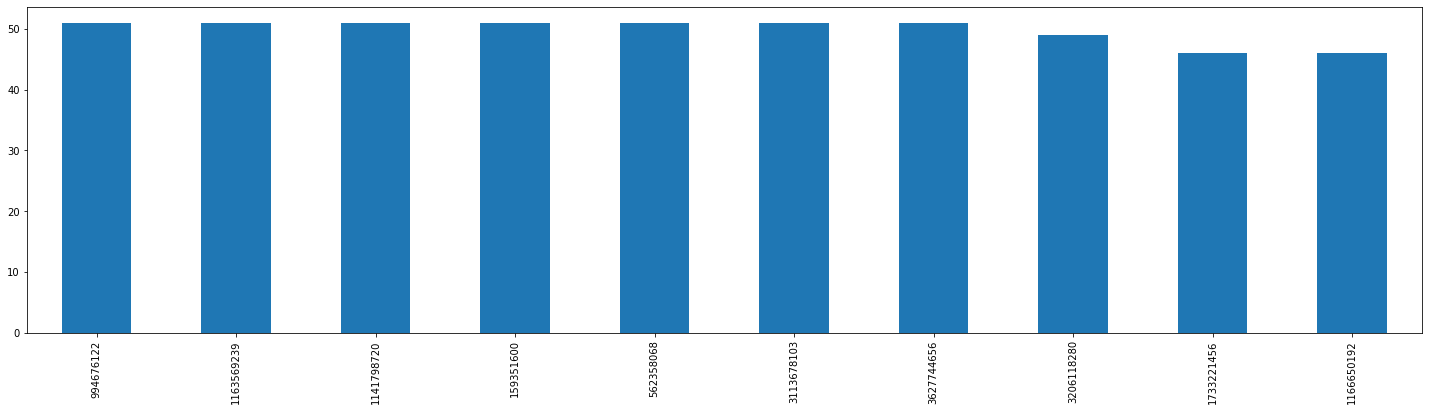

In [18]:
#top 10 label_group ids with maximum number of images in that group
train['label_group'].value_counts()[:10].plot(figsize=(25,6), kind='bar')

In [19]:
train.loc[train['label_group'] == 994676122].head(5)

,posting_id,image,image_phash,title,label_group,clean_title
331,train_4184037897,029b2053e294c26f4a86a871bcddda9c.jpg,d5780e316ed58786,KARET KUCIR PREMIUM,994676122,karet kucir premium
488,train_1010868925,03f94cf522101e71933eb4047c5091fe.jpg,d5780e386cf1f3c0,100Pcs Karet Ikat Rambut Elastis untuk Wanita,994676122,100pcs karet ikat rambut elastis untuk wanita
1715,train_1561375840,0d21864616bb5667f86dfade0e7dab89.jpg,faf1c14a306e9d34,100 Pcs Ikat Rambut Karet Polos Elastis Gaya K...,994676122,100 pcs ikat rambut karet polos elastis gaya k...
2161,train_2963630570,10a062353b3294e1edb20c0fa1da82b0.jpg,88926d277226cfdc,100/1000 Pcs Ikat Rambut Korea Karet Polos Ela...,994676122,1001000 pcs ikat rambut korea karet polos elas...
2402,train_2382946865,12587f2c8522c8a2f9b7308ac0fbc53e.jpg,d5780e316ed59784,Korea women children hair tie head rope karet ...,994676122,korea women children hair tie head rope karet ...


Title:

<AxesSubplot:>

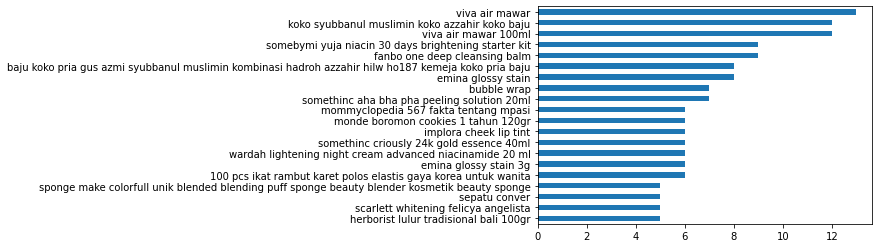

In [20]:
train['clean_title'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')

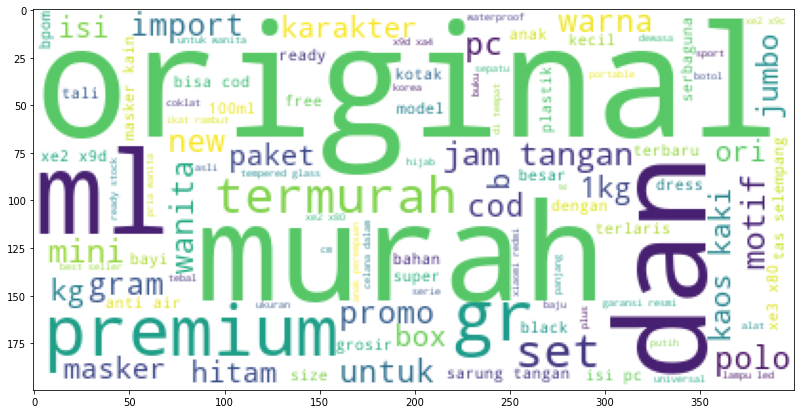

In [21]:
#word cloud visualization
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
wc = WordCloud(
    background_color='white',
    max_words = 100,
    random_state = 42,
    max_font_size=100
    )

wc.generate(' '.join(train['clean_title']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

Words like anak, karakter, untuk, murah are not English. Upon further reading, we found that they are Indonesian words.

In [22]:
import collections
from collections import Counter

In [23]:
def wordBarGraphFunction(df,column,title):
    sw_ind = nltk.corpus.stopwords.words('indonesian')
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in sw_ind]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

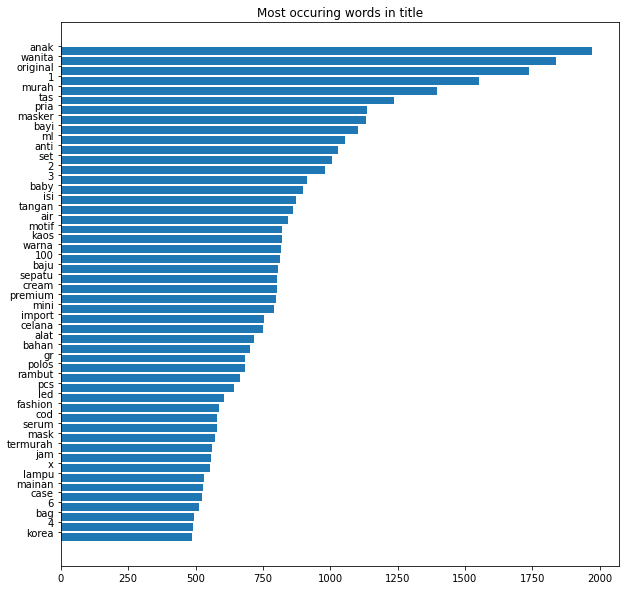

In [24]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(train,'clean_title',"Most occuring words in title")

Anak - Child; Wanita - Women; Murah - Inexpensive; Pria - Men

## Clustering with Bert Embedding

In [25]:
Title = train['clean_title']
Title.head()

0                            paper bag victoria secret
1    double tape 3m vhb 12 mm x 45 original double ...
2          maling tts canned pork luncheon meat 397 gr
3    daster batik lengan pendek motif acak campur l...
4                    nescafe \xc3\x89clair latte 220ml
Name: clean_title, dtype: object

In [26]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 320.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4ff4d8ed3fb6a60697165ee64e9dece979cc043f26cfefc7f3e7d3fa8fe01fc3
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')
from sklearn.cluster import KMeans

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

distilbert-base-nli-mean-tokens is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [28]:
corpus = list(Title)
corpus = corpus[:100]

In [29]:
corpus_embeddings = embedder.encode(corpus)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Sentence-BERT uses a Siamese network like architecture to provide 2 sentences as an input. These 2 sentences are then passed to BERT models and a pooling layer to generate their embeddings. Then use the embeddings for the pair of sentences as inputs to calculate the cosine similarity.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


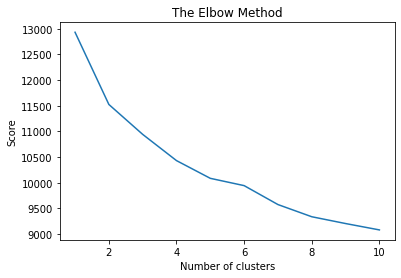

In [30]:
k_clusters = 10
score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(corpus_embeddings)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

Taking k=5 using Elbow method

In [31]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [32]:
cluster_df = pd.DataFrame(corpus, columns=['corpus'])
cluster_df['cluster'] = cluster_assignment #storing the array of clusters in df
cluster_df.head()

,corpus,cluster
0,paper bag victoria secret,0
1,double tape 3m vhb 12 mm x 45 original double ...,1
2,maling tts canned pork luncheon meat 397 gr,1
3,daster batik lengan pendek motif acak campur l...,4
4,nescafe \xc3\x89clair latte 220ml,0


In [33]:
clus_sent = [[] for i in range(num_clusters)]
for sent_id, cluster_id in enumerate(cluster_assignment):
             clus_sent[cluster_id].append(corpus[sent_id])

for i, cluster in enumerate(clus_sent):
             print("Cluster ", i+1)
             print(cluster)
             print("")

Cluster  1
['paper bag victoria secret', 'nescafe \\xc3\\x89clair latte 220ml', 'kulot plisket salur candy plisket wish kulot premium kulot pelangi premiumhieka kulot', 'pashmina kusut rawis polos crinkle shawl murah banget', 'pashmina kusut rawis polos crinkle shawl murah banget part 2', 'hnkfashion sweater hoodie printing babyterry fit l', '[include pajak] nct dream reload album', '[shiyan] mainan gigitan bayi set pack baby teether melatih gigi bayi diatas 3 bulan atau lebih', 'pakaian dalam cewek wings bra bra tempel seamless push bra bh wanita import', 'molina kaftan yadita sparkle kaftan keanu diamond kaftan talisha kaftan', 'pelindung lutut bayi kaos kaki baby knee pad protector', 'headset samsung akg s8 vip9 handsfree samsung hybrid galaxy s8', 'marcks teens compact powder', 'kaos kaki baby karakter 06bulan bahan super soft import', 'lcd jangka sorong digital caliper vernier sigmat kaliper', 'tzuki soap 1 pcs', 'miao anticrack anti crack case type softcase soft case casing benin

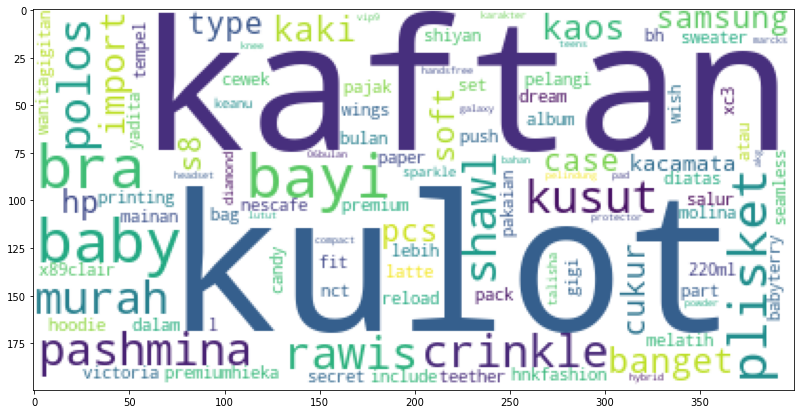

In [34]:
wc.generate(' '.join([text for text in cluster_df['corpus'][cluster_df['cluster']== 0]]))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

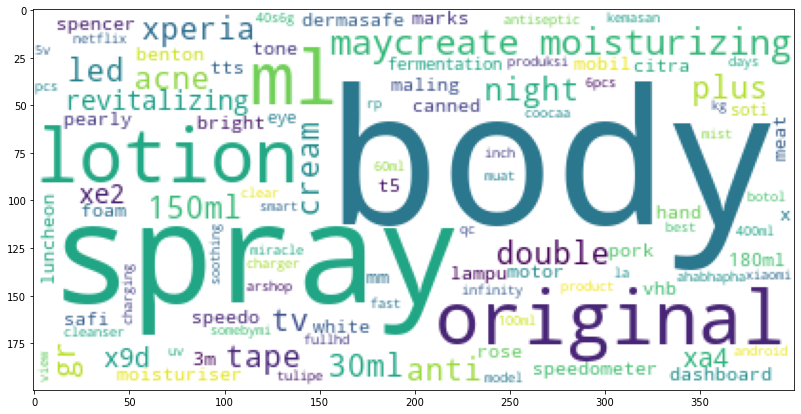

In [35]:
wc.generate(' '.join([text for text in cluster_df['corpus'][cluster_df['cluster']== 1]]))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

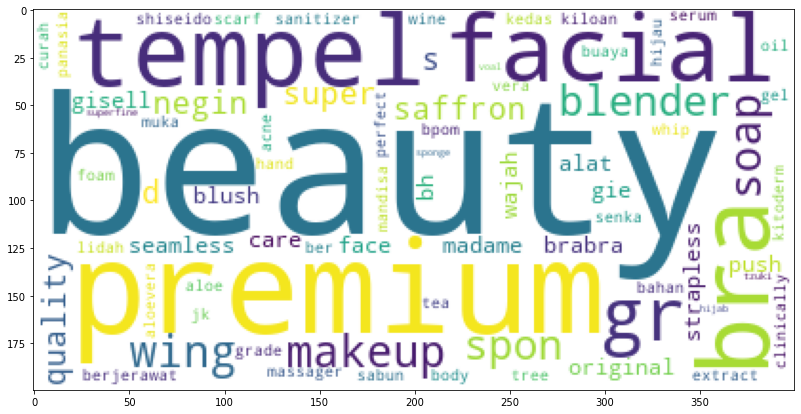

In [36]:
wc.generate(' '.join([text for text in cluster_df['corpus'][cluster_df['cluster']== 2]]))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

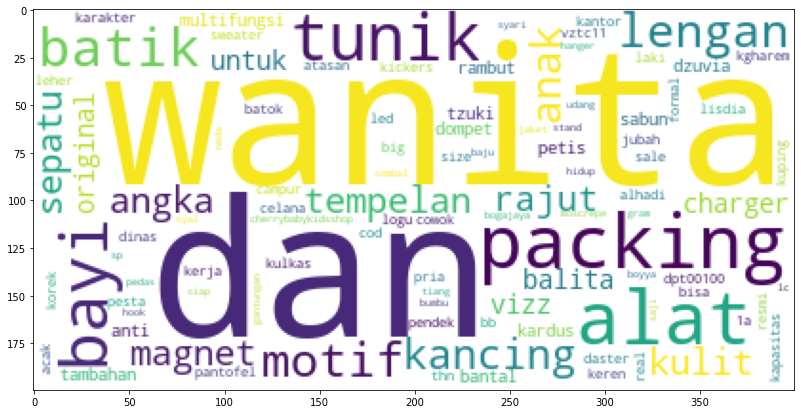

In [37]:
wc.generate(' '.join([text for text in cluster_df['corpus'][cluster_df['cluster']== 4]]))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

## Vectorizing the column clean_text

In [38]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2))
train_vc = vectorizer.fit_transform(train["clean_title"])
df = pd.DataFrame(train_vc.toarray(), columns=vectorizer.get_feature_names())
df.shape

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(34250, 6674)

In [39]:
df.head(5)

,00,000,003,01,02,03,03 tahun,04,05,06,...,zebra,zernii,zinc,zipper,zoom,zoya,zoya mix,zoyamix,zwitsal,zwitsal baby
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Cosine similarity comparison:
#from sklearn.metrics.pairwise import cosine_similarity
#dj = pd.DataFrame(cosine_similarity(df, dense_output=True))
#dj.head()

Cosine similarity is crashing due to the size of the dataset. Even after performing PCA with 50% variance, it still does not work. Therefore, found a workaround using pairwise_distances_chunked from sklearn.metrics

**Text Similarity using vectors:**

In [41]:
from sklearn.metrics import pairwise_distances_chunked
preds1=[]
r = 0.45 #radius within which we are retrieving neighbours
start=0
end=0

#The function which is applied on each chunk of the distance matrix, reducing it to needed values.
def reduce_func(D_chunk, start):
    neigh = [np.flatnonzero(d < r) for d in D_chunk]
    return neigh
#D_chunk is a contiguous vertical slice of the pairwise distance matrix, starting at row start.

for neigh in pairwise_distances_chunked(df, reduce_func=reduce_func, metric='cosine',n_jobs=-1):
    start+=end
    end+=len(neigh)
    print(f'chunk {start} to {end}')
    for i in range(len(neigh)):
        o = train.iloc[neigh[i]].posting_id.values
        preds1.append(o)

train['preds1']=preds1

chunk 0 to 3918
chunk 3918 to 7836
chunk 11754 to 11754
chunk 23508 to 15672
chunk 39180 to 19590
chunk 58770 to 23508
chunk 82278 to 27426
chunk 109704 to 31344
chunk 141048 to 34250


In [42]:
COMPUTE_CV = True
if len(test)>3: COMPUTE_CV = False
    
if COMPUTE_CV:
    tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
    train['Match'] = train.label_group.map(tmp)
    print('train shape is', train.shape )
    train.head()
    
else:
    train = pd.read_csv('../input/shopee-product-matching/test.csv')

train shape is (34250, 8)


In [43]:
tmp = train.groupby('image_phash').posting_id.agg('unique').to_dict()
train['preds2'] = train.image_phash.map(tmp)
train.head()

,posting_id,image,image_phash,title,label_group,clean_title,preds1,Match,preds2
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,paper bag victoria secret,"[train_129225211, train_3982974369, train_1147...","[train_129225211, train_2278313361]",[train_129225211]
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,double tape 3m vhb 12 mm x 45 original double ...,"[train_3386243561, train_1816968361, train_212...","[train_3386243561, train_3423213080]",[train_3386243561]
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,maling tts canned pork luncheon meat 397 gr,"[train_2288590299, train_3803689425]","[train_2288590299, train_3803689425]",[train_2288590299]
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,daster batik lengan pendek motif acak campur l...,"[train_2406599165, train_3576714541, train_150...","[train_2406599165, train_3342059966]",[train_2406599165]
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,nescafe \xc3\x89clair latte 220ml,"[train_3369186413, train_921438619, train_2743...","[train_3369186413, train_921438619]",[train_3369186413]


In [44]:
def getMetric(col):
    def f1score(row):
        n = len( np.intersect1d(row.Match,row[col]) ) #find the intersection of two arrays and return the sorted, unique values that are in both of the input arrays
        return 2*n / (len(row.Match)+len(row[col])) #F1 = 2 * (precision * recall) / (precision + recall)
    return f1score

def combine_for_cv(row):
    x = np.concatenate([row.preds1,row.preds2])
    return np.unique(x)

def combine_for_sub(row):
    x = np.concatenate([row.preds1,row.preds2])
    return ' '.join( np.unique(x) )


if COMPUTE_CV:
    train['oof'] = train.apply(combine_for_cv,axis=1)
    train['f1'] = train.apply(getMetric('oof'),axis=1)
    print('CV Score =', train.f1.mean() )
       
train['matches'] = train.apply(combine_for_sub,axis=1)

CV Score = 0.5679251467709466


In [45]:
train[['posting_id','clean_title','matches']].to_csv('submission.csv',index=False)
sub = pd.read_csv('submission.csv')
sub.head(10)

,posting_id,clean_title,matches
0,train_129225211,paper bag victoria secret,train_1147731811 train_129225211 train_2278313...
1,train_3386243561,double tape 3m vhb 12 mm x 45 original double ...,train_1063149950 train_1816968361 train_183194...
2,train_2288590299,maling tts canned pork luncheon meat 397 gr,train_2288590299 train_3803689425
3,train_2406599165,daster batik lengan pendek motif acak campur l...,train_1508100548 train_1744956981 train_240659...
4,train_3369186413,nescafe \xc3\x89clair latte 220ml,train_2743870047 train_3369186413 train_921438619
5,train_2464356923,celana wanita bb 4584 kgharem wanita bisa cod,train_1070789644 train_2464356923 train_275329...
6,train_1802986387,jubah anak size 112 thn,train_1396161074 train_1802986387 train_209266...
7,train_1806152124,kulot plisket salur candy plisket wish kulot p...,train_1806152124 train_2116320073 train_249095...
8,train_86570404,[logu] tempelan kulkas magnet angka tempelan a...,train_115157077 train_2269068443 train_6697552...
9,train_831680791,big sale sepatu pantofel kulit keren kerja kan...,train_3733529870 train_4111768875 train_831680791
